In [35]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
def read_dataset():
    final_data = {
        "acoustic": [],
        "electrochemical": [],
        "soil_moisture": [],
        "temperature_humidity": [],
        "timestamp": []    
    }
    
    data_json = json.loads(open("../data/agriiot-cloud-export.json", 'r').read())
    
    for k in [*data_json['node_mcu_data']]:
        final_data["acoustic"].append(data_json["node_mcu_data"][k]["acoustic"])
        final_data["electrochemical"].append(data_json["node_mcu_data"][k]["electrochemical"])
        final_data["soil_moisture"].append(data_json["node_mcu_data"][k]["soil_moisture"])
        final_data["temperature_humidity"].append(data_json["node_mcu_data"][k]["temperature_humidity"])
        final_data["timestamp"].append(data_json["node_mcu_data"][k]["timestamp"])
    
    df = pd.DataFrame(final_data)
    return df

In [37]:
farm_data = read_dataset()
index = np.array([x for x in range(1, len(farm_data)+1)])

In [39]:
from ast import literal_eval

farm_data['acoustic'] = farm_data['acoustic'].astype('float64')
farm_data['electrochemical'] = farm_data['electrochemical'].astype('float64')
farm_data['soil_moisture'] = farm_data['soil_moisture'].astype('float64')
farm_data['temperature_humidity'] = [literal_eval(x) for x in farm_data['temperature_humidity']]

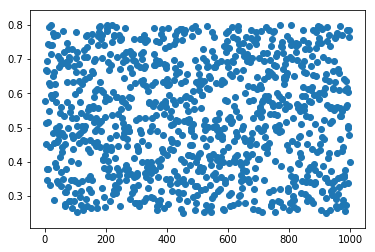

In [41]:
%matplotlib inline
plt.scatter(index, farm_data['acoustic'])
plt.show()

In [ ]:
# lol